# TAKE HOME QUIZ 1.B
Lucieni Saldanha

## Activities

    - Pick some data set (ground truth)
    - Generate a prediction set ( to be compared to ground truth)
    - Analyze predictions and ground truth applying evalution metrics, and explain results
    

## Actual and Prediction Data

In [1]:
# Download a training set from kaggle ( Titanic challenge - binary classification)
# transform csv file to a pandas dataframe 
import pandas as pd
data = pd.read_csv("./train.csv")
data.shape

(891, 12)

We see that our dataset has 891 rows of data, and 12 columns.

In [2]:
# visualize the list of columns in dataframe/dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
# visualize the first 5 rows of our dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We are only interested in the column 'Survived', to obtain a list of 0 and 1. The 'Survived' column with value equal to 0 meant the person did not survive , and for the value equal to 1 the person survived.

In [4]:
# select only column needed for evaluation
is_survived = data.Survived
print(is_survived.head(10))

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


In [5]:
# check for integrity of selected values
print(len(is_survived))

891


Lets generate a random list (that will be our predictions list), and populate it with 0 and 1.

In [6]:
# generate a list with 891 elements, and shuffle elements.
import random
model_predictions = [0] * 445 + [1] * 446

random.shuffle(model_predictions)

print(model_predictions[0:10])


[0, 1, 1, 1, 0, 1, 1, 1, 0, 0]


In [7]:
# turn list into a dataframe
model_predictions_df = pd.DataFrame(model_predictions, columns=["Prediction"])

print(model_predictions_df.shape)


(891, 1)


In [8]:
# print first 10 rows of predicted data
print(model_predictions_df.head(10))

   Prediction
0           0
1           1
2           1
3           1
4           0
5           1
6           1
7           1
8           0
9           0


So far, we have obtained a data set with real values, is_survived, and generated a prediction data set, model_predictions_df.


## Evaluation
We need to evaluate the data is_survived and the model_predictions_df, using evaluation metrics for our binary classification problem.
The metrics to be used:
    
    - Accuracy 
    - Precision-Recall
    - ROC_AUC
    - Log-loss
     

### Confusion matrix and Accuracy

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics

# check for confusion matrix

conf_ma = confusion_matrix(is_survived, model_predictions_df)
conf_ma_df = pd.DataFrame(conf_ma)

print(conf_ma_df.head())


     0    1
0  275  274
1  170  172


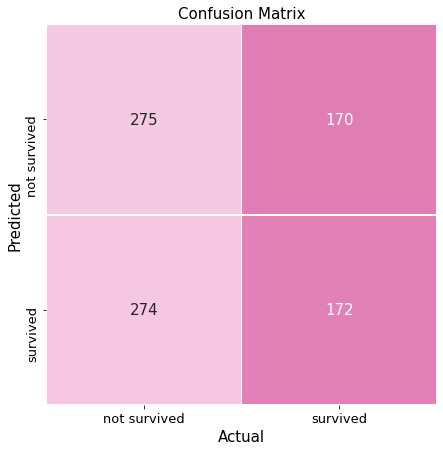

In [54]:
# show Confusion Matrix
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="PiYG", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["not survived","survived"], yticklabels=["no fraud","survived"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["not survived","survived"], fontsize=13)
ax.set_yticklabels(["not survived","survived"], fontsize=13)
plt.title("Confusion Matrix", fontsize=15)

plt.show()

From the data frame matrix, the true positive, true negative, false positive and false negative values are:

In [55]:
tp = conf_ma_df.iloc[1,1]
tn = conf_ma_df.iloc[0,0]
fp = conf_ma_df.iloc[0,1]
fn = conf_ma_df.iloc[1,0]
print(f"True Positive: {tp}",f"True Negative: {tn}",f"False Positive: {fp}",f"False Negative: {fn}", sep='\n' )

True Positive: 172
True Negative: 275
False Positive: 274
False Negative: 170


In [56]:
# calculate accuracy of our random model 
accuracy = (tp + tn)/(tp + tn + fp + fn)
print(accuracy)

0.5016835016835017


Our model can predict outcomes with a 50.17% accuracy.

Checking precision,sensitivity, and specificity of our model:


In [62]:
precision = round(tp / (tp + fp),3)
sensitivity = round(tp / (tp + fn),3)
specificity = round(tn / (tn + fp),3)

print(f"Precision value for our model: {precision}.",
      f"Sensitivy value for our model: {sensitivity}.",
      f"Specificity value for our model: {specificity}.", sep="\n")

Precision value for our model: 0.386.
Sensitivy value for our model: 0.503.
Specificity value for our model: 0.501.


### ROC-AUC
AUC - ROCc curve helps to visualize the performance of classification problems. It tells us how much the model can distinguish the classes. Higher AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
AUC stands for area under the curve, and ROC stands for receiver operating characteristics. 



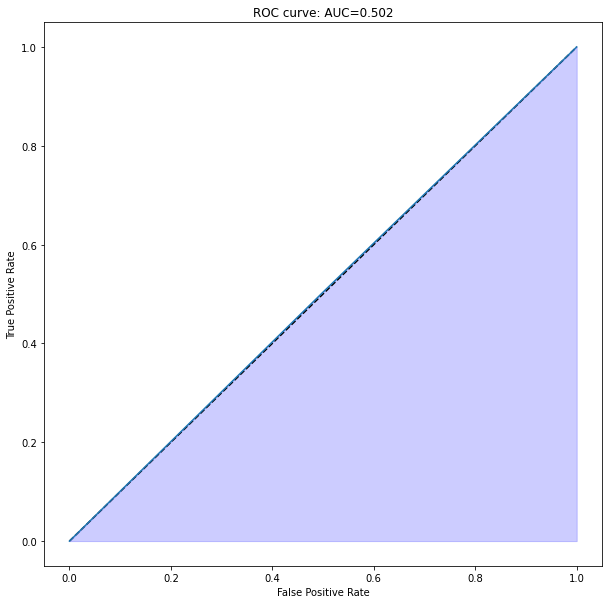

In [58]:
# generating report
report = classification_report(is_survived,model_predictions_df,digits=3,output_dict = True)

# Plot the ROC curve
# Generate points to plot on ROC curve 
fpr_model, tpr_model, thresholds_ = roc_curve(is_survived, model_predictions_df[:])

fig, ax = plt.subplots(figsize = (10,10))

# Plot the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')

# Plot the random
plt.plot(fpr_model, tpr_model)
plt.fill_between(fpr_model, tpr_model, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.3f}'.format(roc_auc_score(is_survived,model_predictions_df[:])))
plt.show()

In [59]:
auc = roc_auc_score(is_survived,model_predictions_df[:])
print(round(auc,3))

0.502



Our model has the AUC equal to 0.502, which means that our random model can not discriminate the classes in our classification problem. This is the worst situation case.

### Precision-Recall
Lets examine the effectiveness of our random model using precision and recall. We plot the precision and recall for different threshold values.




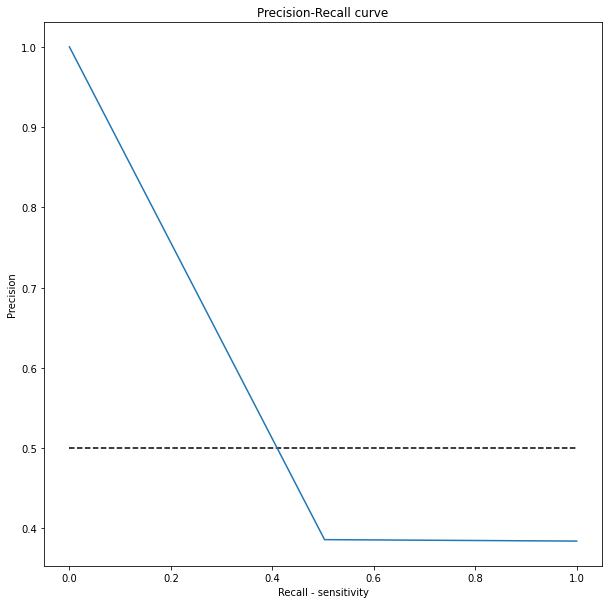

In [70]:
# generate points for the plot of the recall precision curve
precision, recall, thresholds = precision_recall_curve(is_survived, model_predictions_df)

plt.figure(figsize = (10,10))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision)
plt.xlabel('Recall - sensitivity')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


Generally, a good precision-recall curve will passes through the right corner (which would correspond to 100% precision and 100% recall). That would mean fp and fn equal to zero. Looking to our curve, we see that it performed terrible, being far from the right upper corner. This is confirmed because we have a low value for the precision, and a high value for the sensitivity (precision: 0.386; sensitivy: 0.503).

### Log-Loss